In [131]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [162]:
res = pd.read_csv('../SS_DCGAN/results.csv', sep=',') 
#print(res.values)
print(len(res.values))

1080


In [163]:
# This only takes into account images with Glaucoma/Normal label. MESSIDOR images does not have any label

ground_truth = []
for i in res.values:
    if ('Im' in i[0]) and ('_g_' in i[0]):
        ground_truth.append(1)
    elif 'Im' in i[0]:
        ground_truth.append(0)
        
print(len(ground_truth))
#print(sum(ground_truth))
        

722


In [164]:
labels_pred = []
label_prob = []
thres = 0.5
for i in res.values:
    if 'Im' in i[0]:
        label_prob.append(i[1])
        if i[1] > thres:
            # Normal is the label 0
            labels_pred.append(0)
        else:
            # Glaucoma is the label 1
            labels_pred.append(1)
        
print(len(labels_pred))

722


In [165]:
print('Precision - Recall - fscore')
pre_re_fscore = precision_recall_fscore_support(ground_truth, labels_pred, average='micro')
print(pre_re_fscore)

print('Accuracy score')
acc_score = accuracy_score(ground_truth, labels_pred)
print(acc_score)

print('Confusion Matrix')
confu_matrix = confusion_matrix(ground_truth, labels_pred)
print(confu_matrix)

Precision - Recall - fscore
(0.8033240997229917, 0.8033240997229917, 0.8033240997229917, None)
Accuracy score
0.8033240997229917
Confusion Matrix
[[368  61]
 [ 81 212]]


In [184]:
fpr, tpr, _ = roc_curve(ground_truth, label_prob)
roc_auc = auc(fpr,tpr)

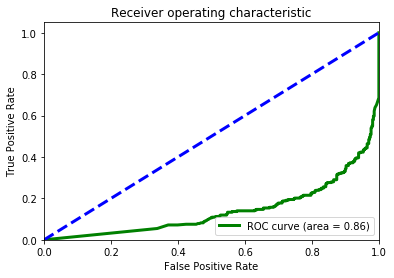

In [187]:
plt.figure()
# How thick we want the lines
lw = 3 
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (area = %0.2f)' % (1-roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
# Limits to x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# labels for x and y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('Receiver operating characteristic')
# position of the curve legend
plt.legend(loc="lower right")
plt.show()